# Speakers Sales Conversion

Muh Amri Sidiq

## Introduction

In today's competitive digital landscape, understanding and optimizing user behavior is key to maximizing sales performance. The Speaker Sales Conversion dataset presents a valuable opportunity to explore and enhance conversion strategies through data-driven insights. This dataset enables various analytical tasks crucial for digital marketing and e-commerce decision-making.

One potential application is A/B testing and multivariate analysis to evaluate and compare the effectiveness of different landing page designs in driving user engagement and conversions. Additionally, user segmentation based on demographics—such as age, gender, and location—allows for a more personalized marketing approach, which can significantly improve targeting and messaging.

Conversion Rate Optimization (CRO) is another core focus, where analysts can identify patterns and friction points in the user journey that affect the likelihood of purchase. Moreover, predictive modeling based on session characteristics can help estimate the probability of conversion for individual users, enabling proactive and tailored interventions.

Finally, the dataset also supports revenue and payment analysis to understand the financial impact of user behavior and marketing efforts. Together, these analytical dimensions offer comprehensive insights into how to increase conversions and improve overall sales performance for speaker products.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

## Import Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sandeep1080/bassburst")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 1.81MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sandeep1080/bassburst/versions/3


In [3]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'cleaned_speakers_data.csv')

df = pd.read_csv(file_path)

cleaned_speakers_data.csv


Check preview data

In [4]:
df.head()

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0


Check structure data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                30000 non-null  object 
 1   session_id             30000 non-null  object 
 2   sign_in                30000 non-null  object 
 3   name                   30000 non-null  object 
 4   demographic_age        30000 non-null  int64  
 5   demographic_age_group  30000 non-null  object 
 6   demographic_gender     30000 non-null  object 
 7   email                  30000 non-null  object 
 8   location               30000 non-null  object 
 9   country                30000 non-null  object 
 10  device_type            30000 non-null  object 
 11  timestamp              30000 non-null  object 
 12  variant_group          30000 non-null  object 
 13  time_spent             30000 non-null  float64
 14  pages_visited          30000 non-null  int64  
 15  co

## Exploratory Data Analysis

### A/B Testing

Test whether there is a significant difference in conversion rate between the three groups (vibrant, heat, and cold), change data type `timestamp` to datetime

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df['variant_group'].value_counts()

,count
variant_group,
Vibrant,10046
Heat,10026
Cold,9928


make 3 (vibrant, heat, cold) group data by `variant`

In [8]:
group_vibrant = df[df['variant_group'] == 'Vibrant']
group_heat = df[df['variant_group'] == 'Heat']
group_cold = df[df['variant_group'] == 'Cold']

get mean `conversion_flag` and `revenue` every `variant_group`

In [9]:
conv_rate_vibrant = group_vibrant['conversion_flag'].mean()
conv_rate_heat = group_heat['conversion_flag'].mean()
conv_rate_cold = group_cold['conversion_flag'].mean()
revenue_vibrant = group_vibrant['revenue_$'].mean()
revenue_heat = group_heat['revenue_$'].mean()
revenue_cold = group_cold['revenue_$'].mean()

Statistical tests for conversion and income

In [10]:
test_conversion = stats.f_oneway(group_vibrant['conversion_flag'], group_heat['conversion_flag'], group_cold['conversion_flag'])
test_revenue = stats.f_oneway(group_vibrant['revenue_$'], group_heat['revenue_$'], group_cold['conversion_flag'])

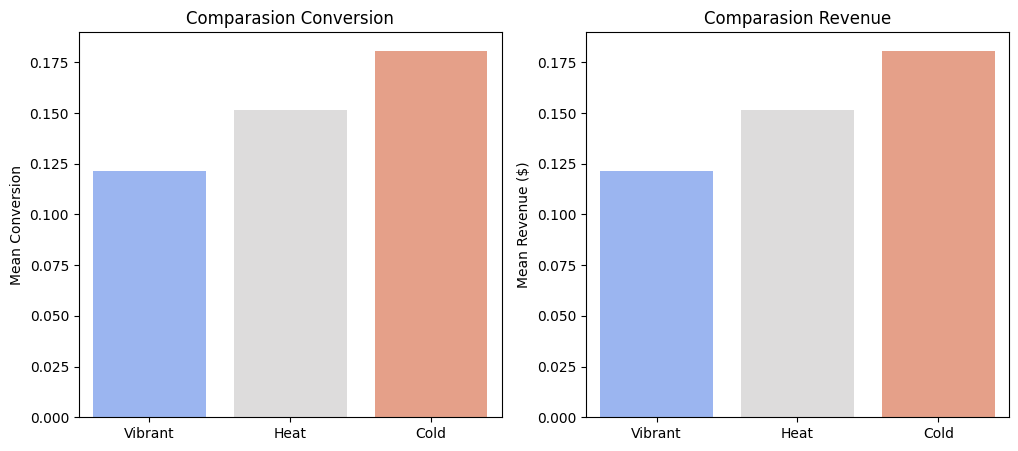

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=['Vibrant', 'Heat', 'Cold'], y=[conv_rate_vibrant, conv_rate_heat, conv_rate_cold], ax=axes[0], hue=['Vibrant', 'Heat', 'Cold'], palette='coolwarm')
axes[0].set_title("Comparasion Conversion")
axes[0].set_ylabel("Mean Conversion")

sns.barplot(x=['Vibrant', 'Heat', 'Cold'], y=[conv_rate_vibrant, conv_rate_heat, conv_rate_cold], ax=axes[1], hue=['Vibrant', 'Heat', 'Cold'], palette='coolwarm')
axes[1].set_title("Comparasion Revenue")
axes[1].set_ylabel("Mean Revenue ($)")

plt.show()

In [18]:
print("A/B/C Testing For Conversi:", test_conversion)
print("A/B/C Testing For Revenue:", test_revenue)

A/B/C Testing For Conversi: F_onewayResult(statistic=np.float64(69.11803141401856), pvalue=np.float64(1.1255739865805544e-30))
A/B/C Testing For Revenue: F_onewayResult(statistic=np.float64(159.4605349202226), pvalue=np.float64(1.296345731632628e-69))


Insight: Since the p-value is 0.05 for both tests, H0 (null hypothesis) is rejected, meaning at least one group is significantly different from the others in terms of both conversion and income.

### Tukey HSD

To perform post-hoc tests after one-way ANOVA, we can use Tukey's Honest Significant Difference (Tukey's HSD). Tukey's HSD helps us determine which pairs of groups have significant differences in conversion and income.

In [13]:
tukey_conversion = pairwise_tukeyhsd(endog=df['conversion_flag'],
                                     groups=df['variant_group'],
                                     alpha=0.05)
print("Result Tukey HSD for conversion:")
print(tukey_conversion)

Result Tukey HSD for conversion:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
  Cold    Heat  -0.0291   0.0  -0.041 -0.0172   True
  Cold Vibrant  -0.0595   0.0 -0.0713 -0.0476   True
  Heat Vibrant  -0.0304   0.0 -0.0422 -0.0185   True
----------------------------------------------------


Insight:

1. Cold vs. Heat
   - Meandiff = -0.0291 → The average conversion rate of the Cold group is 2,91% lower than the Heat group.
   - p-adj = 0.000 → Highly significant (p < 0.05), so the difference is not accidental.
   - Reject = True → Indicates that this difference is significant.

2. Cold vs. Vibrant
   - Meandiff = -0.0595 → The average conversion rate of the Cold group is 5.95% lower than the Vibrant group.
   - p-adj = 0.000 → Highly significant difference.
   - Reject = True → The difference is significant.

3. Heat vs. Vibrant
   - Meandiff = -0.0304 → The average conversion rate of the Heat group is 3.04% lower than that of the Vibrant group.
   - p-adj = 0.000 → Highly significant difference.
   - Reject = True → The difference is significant.

In [19]:
tukey_revenue = pairwise_tukeyhsd(endog=df['revenue_$'],
                                  groups=df['variant_group'],
                                  alpha=0.05)

print("\nResult Tukey HSD for Revenue:")
print(tukey_revenue)


Result Tukey HSD for Revenue:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
  Cold    Heat   -4.559 0.0497  -9.1137 -0.0043   True
  Cold Vibrant  -8.9825    0.0 -13.5349 -4.4301   True
  Heat Vibrant  -4.4235 0.0582  -8.9647  0.1178  False
------------------------------------------------------


Insight:

1. Cold vs. Heat
   - Meandiff = -4.559 → The average revenue in the Cold group is $4.56 lower than the Heat group.
   - p-adj = 0.0497 → The p value is close to 0.05, meaning that this difference is almost significant.
   - Reject = True → This means that the revenue difference between Cold and Heat is significant.

2. Cold vs. Vibrant
   - Meandiff = -8.9825 → The average revenue in the Cold group is $8.98 lower than the Vibrant group.
   - p-adj = 0.0000 → The p value is very small, meaning the difference is very significant.
   - Reject = True → The revenue difference between Cold and Vibrant is significant.

3. Heat vs. Vibrant
   - Meandiff = -4.4235 → The average revenue in the Heat group is $4.42 lower than the Vibrant group.
   - p-adj = 0.0582 → The p value is slightly above 0.05, so the difference is not significant.
   - Reject = False → This means that Heat and Vibrant do not have a significant difference in revenue.

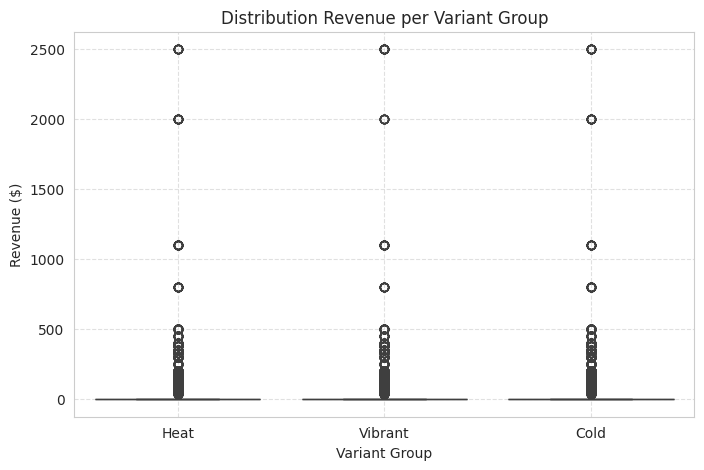

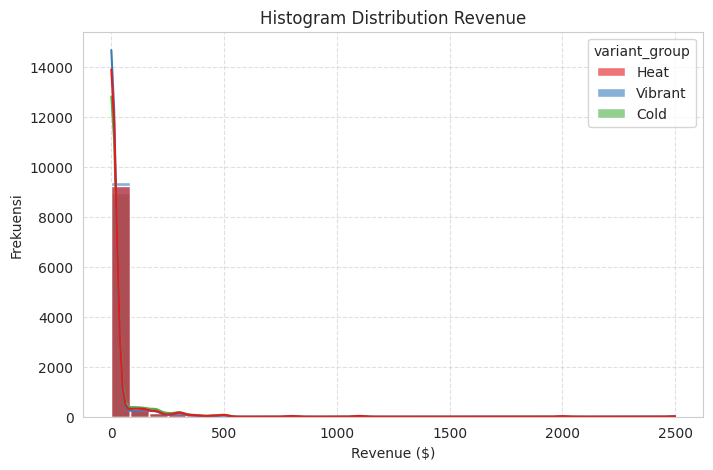

In [20]:
sns.set_style("whitegrid")

# Boxplot Revenue per Variant Group
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['variant_group'], y=df['revenue_$'])
plt.title("Distribution Revenue per Variant Group")
plt.xlabel("Variant Group")
plt.ylabel("Revenue ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Histogram Distribusi Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df, x="revenue_$", hue="variant_group", kde=True, bins=30, palette="Set1", alpha=0.6)
plt.title("Histogram Distribution Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Multivariate Analysis (ANOVA)

Multivariate Analysis of Variance (MANOVA) is an extension of ANOVA that is used when we want to test the mean difference of more than one dependent variable (response) simultaneously based on one or more independent factors (categories).

While ANOVA only compares one dependent variable, MANOVA can compare multiple dependent variables at once.

In [21]:
model = ols('conversion_flag ~ C(variant_group) + time_spent + pages_visited', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Multivariate Analysis (ANOVA) For Conversion:")
print(anova_table)

Multivariate Analysis (ANOVA) For Conversion:
                       sum_sq       df          F        PR(>F)
C(variant_group)    17.655082      2.0  69.102125  1.143550e-30
time_spent           0.007659      1.0   0.059957  8.065658e-01
pages_visited        0.042772      1.0   0.334820  5.628391e-01
Residual          3831.750460  29995.0        NaN           NaN


Insight:

1. variant_group (Cold, Heat, Vibrant)
   - F-statistic = 69.10, p-value = 1.14e-30 (very small).
   - The p-value is 0.05, meaning that there is a significant difference between ad variant groups on conversion_flag.
   - This means that ad design (Cold, Heat, Vibrant) does affect the conversion rate statistically.

2. time_spent (Time spent on site)
   - F-statistic = 0.06, p-value = 0.8066 (greater than 0.05).
   - There is no significant relationship between time spent and conversion
   - This suggests that users who are longer on the site are not necessarily more likely to convert.

3. pages_visited
   - F-statistic = 0.33, p-value = 0.5628 (greater than 0.05).
   - There is no significant relationship between the number of pages visited and conversions.
   - This means that the number of pages viewed does not directly increase the chance of conversion.

In [22]:
demographic_segments = df.groupby(['demographic_age_group', 'demographic_gender', 'location']).agg({
    'conversion_flag': 'mean',
    'revenue_$': 'mean',
    'time_spent': 'mean',
    'pages_visited': 'mean'
}).reset_index()
print("User Segmentation by Demographics:")
print(demographic_segments.head(10))

User Segmentation by Demographics:
  demographic_age_group demographic_gender     location  conversion_flag  \
0                 Adult             Female    Bangalore         0.160112   
1                 Adult             Female      Beijing         0.169279   
2                 Adult             Female       Berlin         0.118541   
3                 Adult             Female      Chicago         0.133152   
4                 Adult             Female        Delhi         0.119114   
5                 Adult             Female        Dubai         0.159763   
6                 Adult             Female    Hong Kong         0.117479   
7                 Adult             Female       London         0.162983   
8                 Adult             Female  Los Angeles         0.130081   
9                 Adult             Female         Lyon         0.162420   

   revenue_$  time_spent  pages_visited  
0  20.556320   10.658287       5.415730  
1  26.888213   10.277743       5.266458  
2 

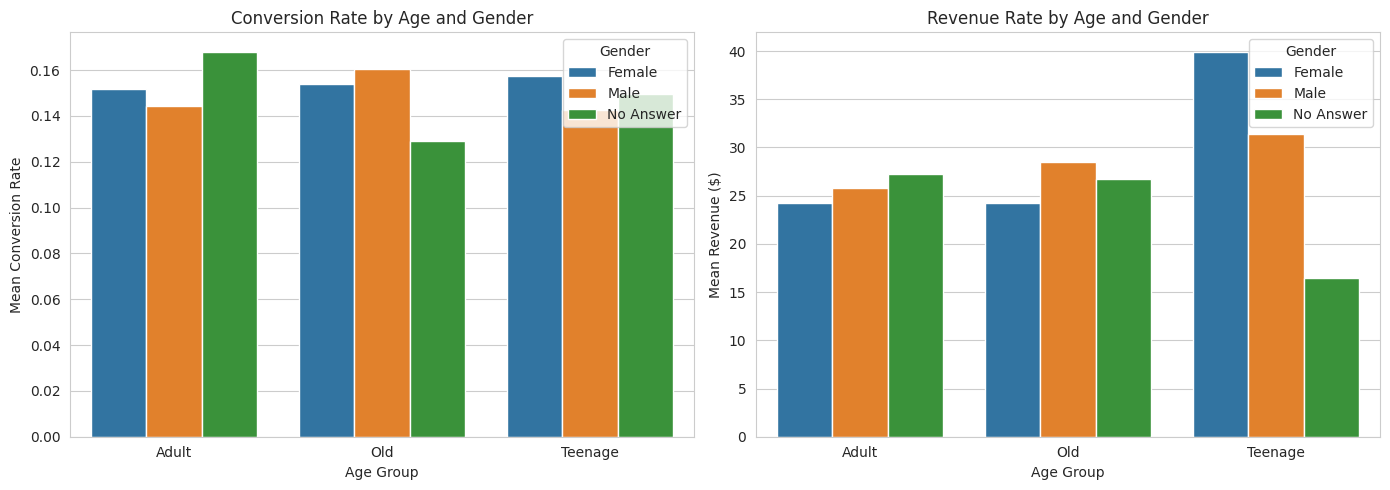

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1st barplot for Conversion Rate
sns.barplot(data=demographic_segments, x='demographic_age_group', y='conversion_flag', hue='demographic_gender', errorbar=None, ax=axes[0])
axes[0].set_title("Conversion Rate by Age and Gender")
axes[0].set_ylabel("Mean Conversion Rate")
axes[0].set_xlabel("Age Group")
axes[0].legend(title="Gender")

# 2nd Barplot for Revenue
sns.barplot(data=demographic_segments, x='demographic_age_group', y='revenue_$', hue='demographic_gender', errorbar=None, ax=axes[1])
axes[1].set_title("Revenue Rate by Age and Gender")
axes[1].set_ylabel("Mean Revenue ($)")
axes[1].set_xlabel("Age Group")
axes[1].legend(title="Gender")

plt.tight_layout()
plt.show()

Insight:

 - `Age_group` adult with `gender` No Answer have highest `mean_conversion_rate`, and `Age_group` adult with `gender` Male have lowest `mean_conversion_rate`
 - `Age_group` old with `gender` Male have highest `mean_conversion_rate`, `Age_group` old with `gender` No Answer have Lowest `mean_conversion_rate`
 - `Age_group` Teenage with `gender` Female have highest `mean_conversion_rate`, `Age_group` Teenage with `gender` Male have Lowest `mean_conversion_rate`
 - `Age_group` Adult with `gender` No Answer have highest `mean_revenue($)`, `Age_group` Adult with `gender` Male have Lowest `mean_revenue($)`
 - `Age_group` Old with `gender` Male have highest `mean_revenue($)`, `Age_group` Old with `gender` Female have Lowest `mean_revenue($)`
 - `Age_group` Teenage with `gender` Female have highest `mean_revenue($)`, `Age_group` Teenage with `gender` No Answer have Lowest `mean_revenue($)`

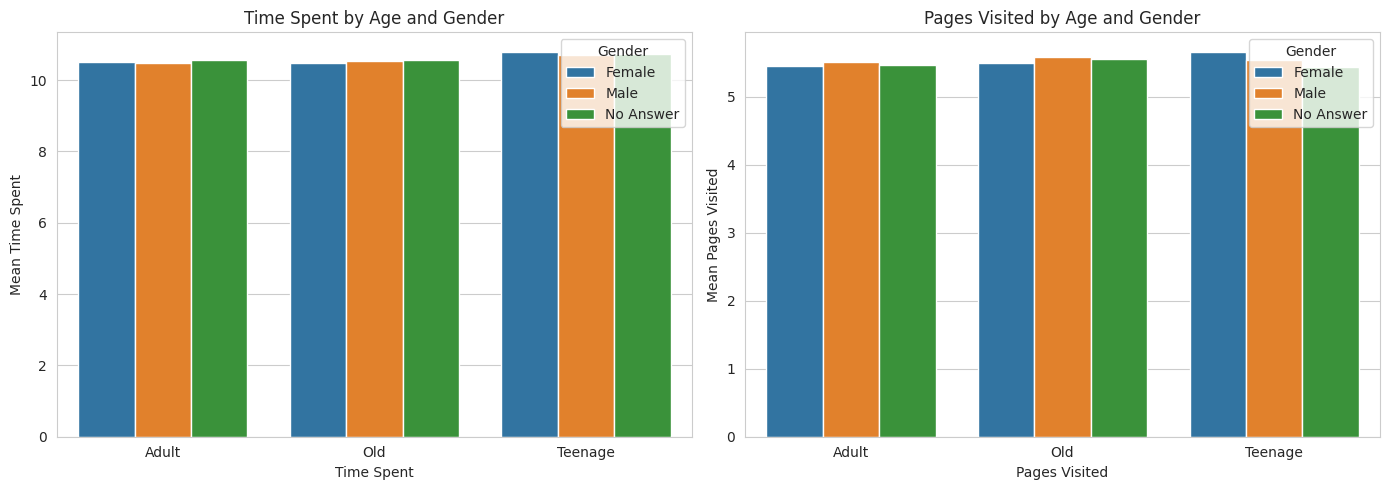

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1st barplot for Time Spent
sns.barplot(data=demographic_segments, x='demographic_age_group', y='time_spent', hue='demographic_gender', errorbar=None, ax=axes[0])
axes[0].set_title("Time Spent by Age and Gender")
axes[0].set_ylabel("Mean Time Spent")
axes[0].set_xlabel("Time Spent")
axes[0].legend(title="Gender")

# 2nd Barplot for Pages Visited
sns.barplot(data=demographic_segments, x='demographic_age_group', y='pages_visited', hue='demographic_gender', errorbar=None, ax=axes[1])
axes[1].set_title("Pages Visited by Age and Gender")
axes[1].set_ylabel("Mean Pages Visited")
axes[1].set_xlabel("Pages Visited")
axes[1].legend(title="Gender")

plt.tight_layout()
plt.show()

Insight:

 - `Age_group` Adult with `gender` No Answer have highest `mean_time_spent`, and `Age_group` Adult with `gender` Male have lowest `mean_time_spent`
 - `Age_group` Old with `gender` No Answer have highest `mean_time_spent`, and `Age_group` Old with `gender` Female have lowest `mean_time_spent`
 - `Age_group` Teenage with `gender` Female have highest `mean_time_spent`, and `Age_group` Teenage with `gender` Male have lowest `mean_time_spent`
 - `Age_group` Adult with `gender` Female have highest `mean_pages_visited`, and `Age_group` Adult with `gender` Female have lowest `mean_pages_visited`
 - `Age_group` Old with `gender` Male have highest `mean_pages_visited`, and `Age_group` Old with `gender` Female have lowest `mean_pages_visited`
 - `Age_group` Teenage with `gender` Female have highest `mean_pages_visited`, and `Age_group` Teenage with `gender` No ANswer have lowest `mean_pages_visited`

### Cluster Analysis

Cluster Analysis is used to find hidden patterns in customer data by grouping them based on similar characteristics. In this case, we can use K-Means Clustering or Hierarchical Clustering to divide customers into segments based on metrics such as:

 - Conversion Rate (`conversion_flag`)
 - Revenue (`revenue_$`)
 - Time Spent (`time_spent`)
 - Pages Visited (`pages_visited`)

In [25]:
df_cluster = demographic_segments.drop(['demographic_age_group', 'demographic_gender', 'location'], axis=1)

#### 1. Normalization Data

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

#### 2. Determining the Number of Clusters with Elbow Method

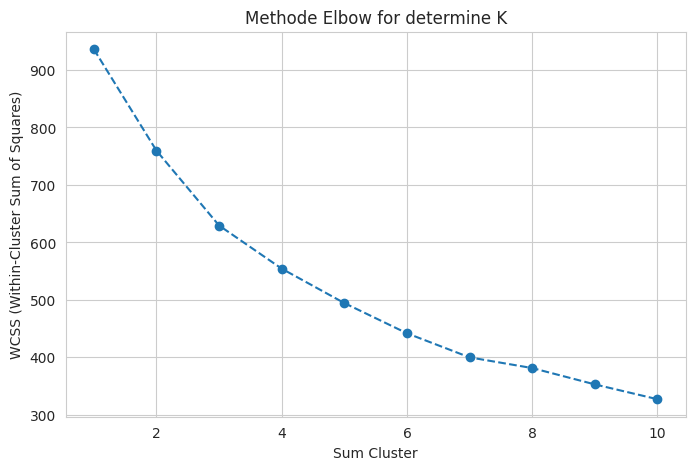

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Sum Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Methode Elbow for determine K')
plt.show()

Insight: 3 cluster

#### 3. K-Means Clustering (Chose K Determine Elbow Method)

In [28]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(scaled_features)

#### 4. Vizualitation with PCA (Reduction Dimention)

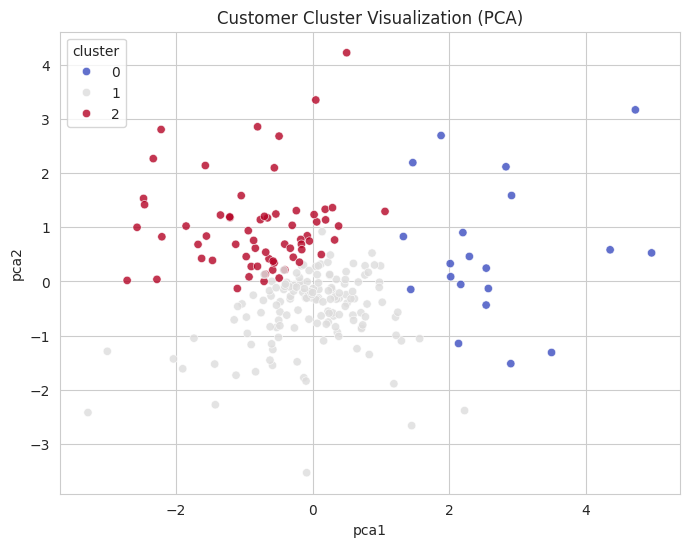

In [29]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df_cluster['pca1'] = pca_components[:, 0]
df_cluster['pca2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='coolwarm', alpha=0.8)
plt.title("Customer Cluster Visualization (PCA)")
plt.show()

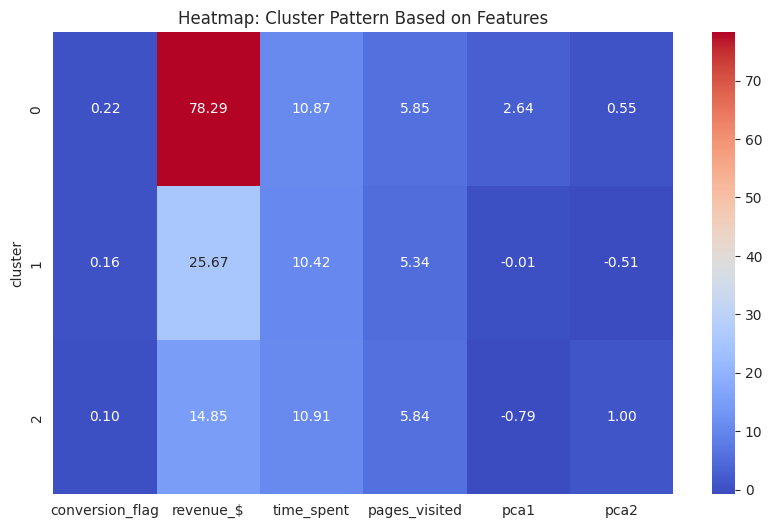

In [30]:
df_clustered = df_cluster.groupby('cluster').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Cluster Pattern Based on Features")
plt.show()

Insight:

 - cluster 0 with highest `conversion_flag`, `revenue_$` and `pages_visited`, medium for `time_spent`
 - cluster 1 with medium `conversion_flag` and `revenue_$`, lowest `time_spent` and `pages_visited`
 - cluster 2 with lowest `conversion_flag`, `revenue_$`, highest `time_spent` and medium `pages_visited`

### CRO

Conversion Rate Optimization (CRO) is the process of analyzing and improving marketing strategies or product design to increase user conversion rates. In this context, CRO helps understand the factors that influence conversion, engagement, and revenue based on A/B/C Testing experiments.

In [31]:
df['engagement_score'] = df['time_spent'] * df['pages_visited']
cro_analysis = df.groupby('variant_group').agg({
    'conversion_flag': 'mean',
    'engagement_score': 'mean',
    'revenue_$': 'mean'
}).reset_index()
print("Conversion Rate Optimization Analysis (CRO):")
print(cro_analysis)

Conversion Rate Optimization Analysis (CRO):
  variant_group  conversion_flag  engagement_score  revenue_$
0          Cold         0.180802         57.867111  30.740110
1          Heat         0.151706         57.741883  26.181090
2       Vibrant         0.121342         57.990921  21.757632


<Figure size 1200x500 with 0 Axes>

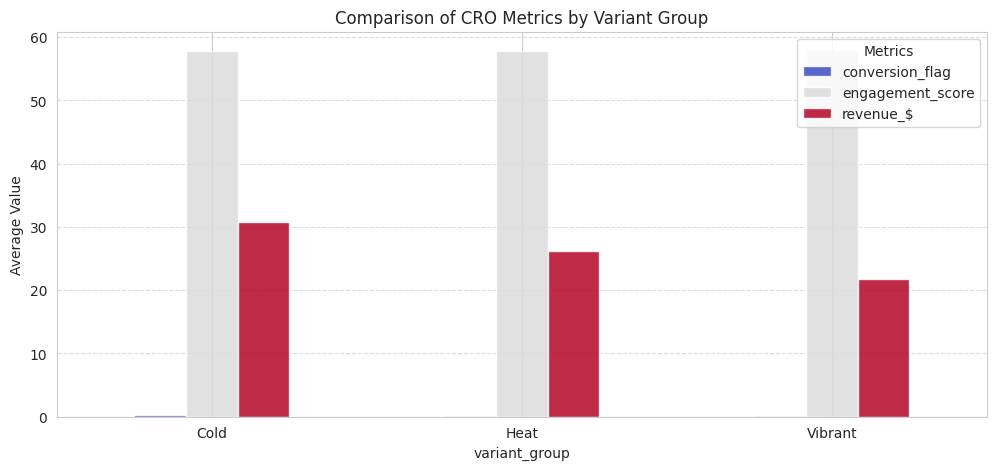

In [32]:
plt.figure(figsize=(12, 5))
cro_analysis.set_index('variant_group').plot(kind='bar', figsize=(12, 5), colormap='coolwarm', alpha=0.85)
plt.title('Comparison of CRO Metrics by Variant Group')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics")
plt.show()

Insight:

 - Cold has the highest conversion (18.08%) and highest revenue ($30.74), although the engagement score is almost the same as the other groups.

 - Vibrant has the lowest conversion (12.13%) and lowest revenue ($21.75), although its engagement is the highest.

 - Heat is in the middle for all metrics.

### Payment Analysis

Payment Analysis is the process of analyzing payment data to understand customer transaction patterns, the most effective payment methods, and factors that affect revenue and conversion.

In [34]:
df_payment = df.groupby(['payment_type', 'card_type']).agg({
    'revenue_$': ['mean', 'sum'],
    'conversion_flag': 'mean'
}).reset_index().reset_index()
df_payment.columns = ['_'.join(col).strip() for col in df_payment.columns.values]
print("Payment Analysis:")
print(df_payment.head(10))

Payment Analysis:
   index_ payment_type_ card_type_  revenue_$_mean  revenue_$_sum  \
0       0           COD       NCAT      245.181226      219927.56   
1       1          Card       Amex      283.093038      191937.08   
2       2          Card     Master      259.065474      183159.29   
3       3          Card       Visa      269.341775      191232.66   
4       4           NPT       NCAT        0.000000           0.00   

   conversion_flag_mean  
0              1.000000  
1              1.000000  
2              1.000000  
3              1.000000  
4              0.057131  


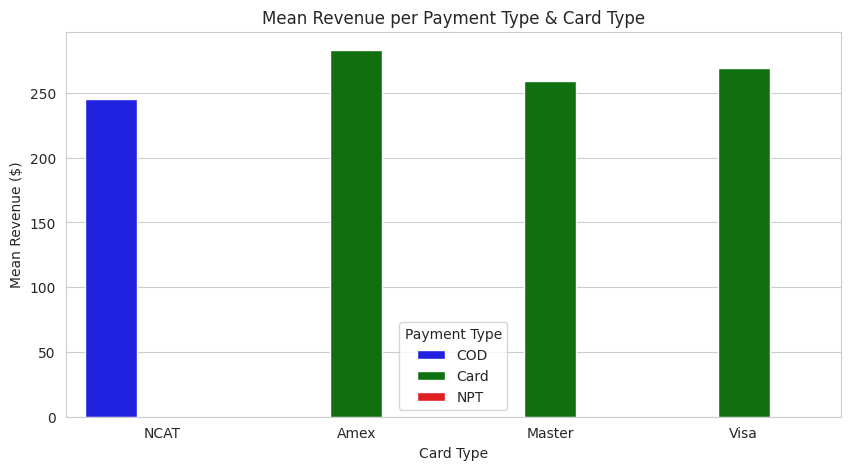

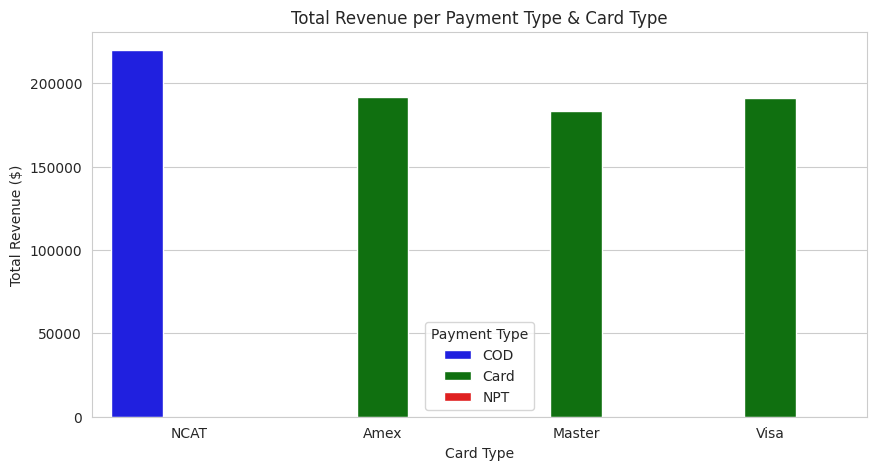

In [35]:
palette = {"COD": "blue", "Card": "green", "NPT": "red"}

# Plot Mean Revenue
plt.figure(figsize=(10, 5))
sns.barplot(data=df_payment, x="card_type_", y="revenue_$_mean", hue="payment_type_", palette=palette)
plt.title("Mean Revenue per Payment Type & Card Type")
plt.xlabel("Card Type")
plt.ylabel("Mean Revenue ($)")
plt.legend(title="Payment Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_payment, x="card_type_", y="revenue_$_sum", hue="payment_type_", palette=palette)
plt.title("Total Revenue per Payment Type & Card Type")
plt.xlabel("Card Type")
plt.ylabel("Total Revenue ($)")
plt.legend(title="Payment Type")
plt.show()


Insight:

 - `revenue_$_mean` highest use `card_type_` Amex with `payment_type_` Card and `revenue_$_mean` lowest use `card_type_` NCAT with `payment_type_` COD.

 - `revenue_$_sum` highest use `card_type_` NCAT with `payment_type_` COD and `revenue_$_sum` lowest use `card_type_` Master with `payment_type_` Card

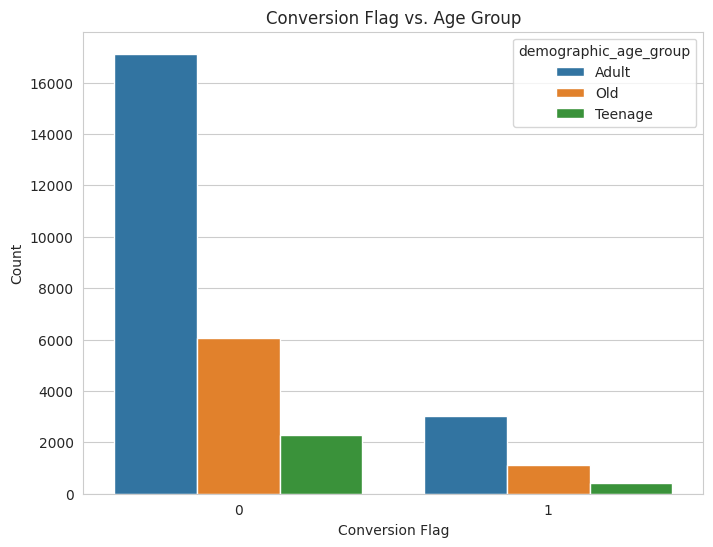

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_flag', hue='demographic_age_group', data=df)
plt.title('Conversion Flag vs. Age Group')
plt.xlabel('Conversion Flag')
plt.ylabel('Count')
plt.show()

Insight:

 - `conversion_flag` type 0 have highest `demographic_age_group` type Adult and `conversion_flag` type 0 have lowest `demographic_age_group` type Teenage

 - `conversion_flag` type 1 have highest `demographic_age_group` type Adult and `conversion_flag` type 1 have lowest `demographic_age_group` type Teenage

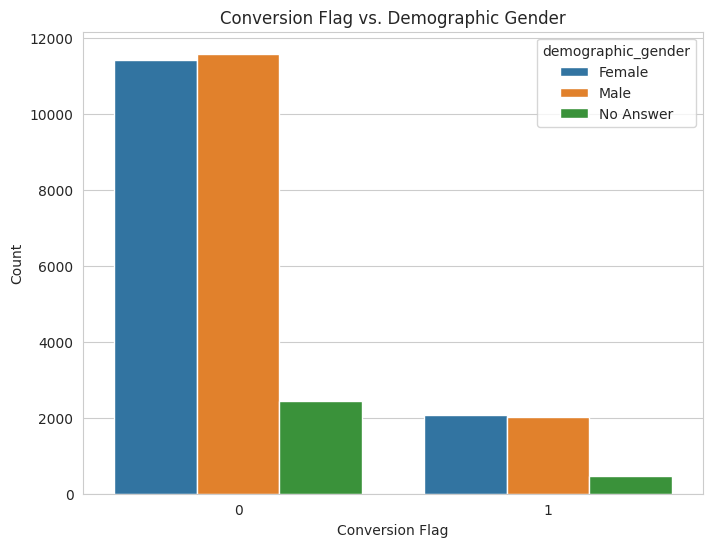

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_flag', hue='demographic_gender', data=df)
plt.title('Conversion Flag vs. Demographic Gender')
plt.xlabel('Conversion Flag')
plt.ylabel('Count')
plt.show()

Insight:

 - `conversion_flag` type 0 have highest `demographic_gender` type Male and `conversion_flag` type 0 have lowest `demographic_gender` type No Answer

 - `conversion_flag` type 1 have highest `demographic_gender` type Female and `conversion_flag` type 1 have lowest `demographic_gender` type No Answer

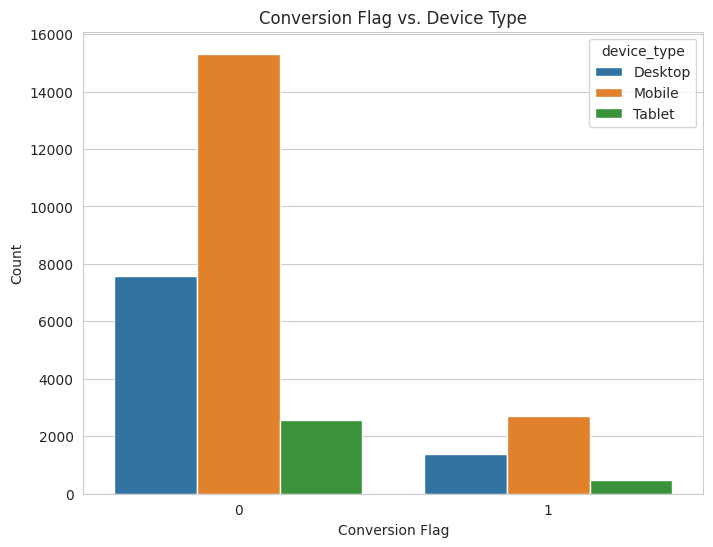

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_flag', hue='device_type', data=df)
plt.title('Conversion Flag vs. Device Type')
plt.xlabel('Conversion Flag')
plt.ylabel('Count')
plt.show()

Insight:

 - `conversion_flag` type 0 have highest `device_type` type Mobile and `conversion_flag` type 0 have lowest `device_type` type Tablet

 - `conversion_flag` type 1 have highest `device_type` type Mobile and `conversion_flag` type 1 have lowest `device_type` type Tablet

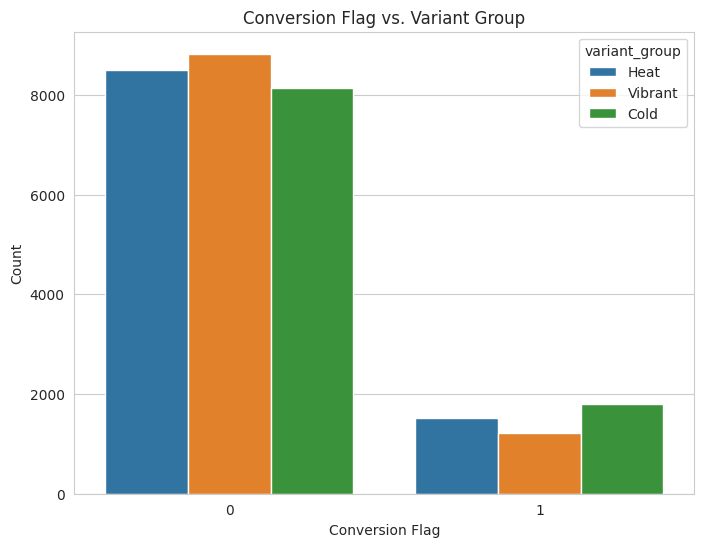

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_flag', hue='variant_group', data=df)
plt.title('Conversion Flag vs. Variant Group')
plt.xlabel('Conversion Flag')
plt.ylabel('Count')
plt.show()

Insight:

 - `conversion_flag` type 0 have highest `variant_group` type Vibrant and `conversion_flag` type 0 have lowest `variant_group` type Cold

 - `conversion_flag` type 1 have highest `variant_group` type Cold and `conversion_flag` type 1 have lowest `variant_group` type Vibrant

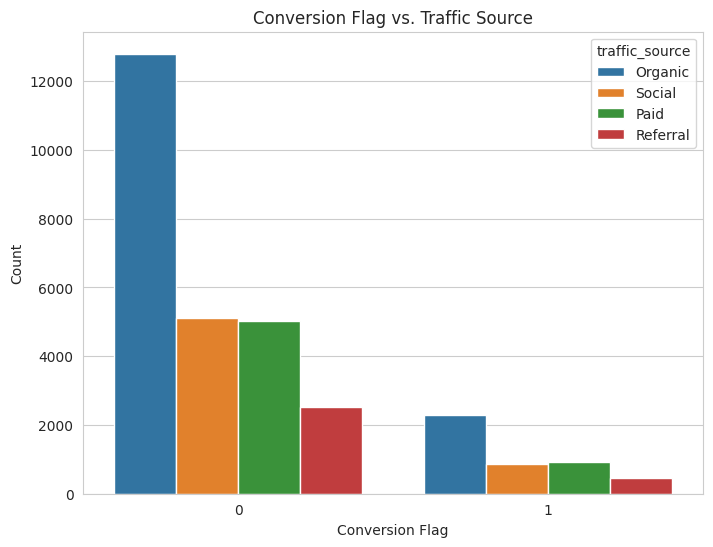

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_flag', hue='traffic_source', data=df)
plt.title('Conversion Flag vs. Traffic Source')
plt.xlabel('Conversion Flag')
plt.ylabel('Count')
plt.show()

Insight:

 - `conversion_flag` type 0 have highest `traffic_source` type Organic and `conversion_flag` type 0 have lowest `traffic_source` type Referral

 - `conversion_flag` type 1 have highest `traffic_source` type Organic and `conversion_flag` type 1 have lowest `traffic_source` type Referral

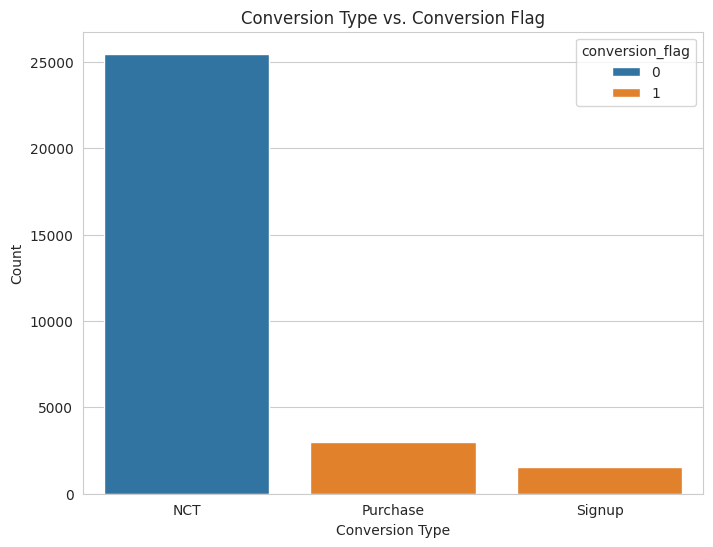

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion_type', hue='conversion_flag', data=df)
plt.title('Conversion Type vs. Conversion Flag')
plt.xlabel('Conversion Type')
plt.ylabel('Count')
plt.show()


Insight:

 - All `conversion_flag` type 0 use `conversion_type` NCT
 - `conversion_flag` type 1 use `conversion_type` Purchase and Signup

## Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that improve the performance of a machine learning model. It involves creating new features, selecting the most relevant ones, and modifying existing ones to better represent patterns in the data

Extract `timestamp`

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['session_part_of_day'] = df['hour'].apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))

extract `time_spent`, `engagement_score` and `page_visited`

In [43]:
df['ratio_ts_es'] = df['time_spent']/df['engagement_score']
df['ratio_pv_es'] = df['pages_visited']/df['engagement_score']

## Preparation Data

Use feature and change data type object to encoding

In [44]:
df_clean = df.drop(['user_id', 'session_id', 'name', 'timestamp', 'conversion_type', 'email'], axis=1)

In [45]:
# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in categorical_cols:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

In [46]:
x = df_clean.drop('conversion_flag', axis=1)
y = df_clean['conversion_flag']

## Modeling

Before modeling applied, split data train and data validation to train model

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

In [48]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
grid_search = GridSearchCV(model_xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [49]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
y_pred_proba = best_model.predict_proba(x_val)[:, 1]

print("Accuracy of Conversion Prediction Model:", accuracy_score(y_val, y_pred))
print("AUC Score:", roc_auc_score(y_val, y_pred_proba))
print("Report Classification:")
print(classification_report(y_val, y_pred))

Accuracy of Conversion Prediction Model: 0.9461666666666667
AUC Score: 0.8776462488224155
Report Classification:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5098
           1       1.00      0.64      0.78       902

    accuracy                           0.95      6000
   macro avg       0.97      0.82      0.88      6000
weighted avg       0.95      0.95      0.94      6000



<Figure size 1000x600 with 0 Axes>

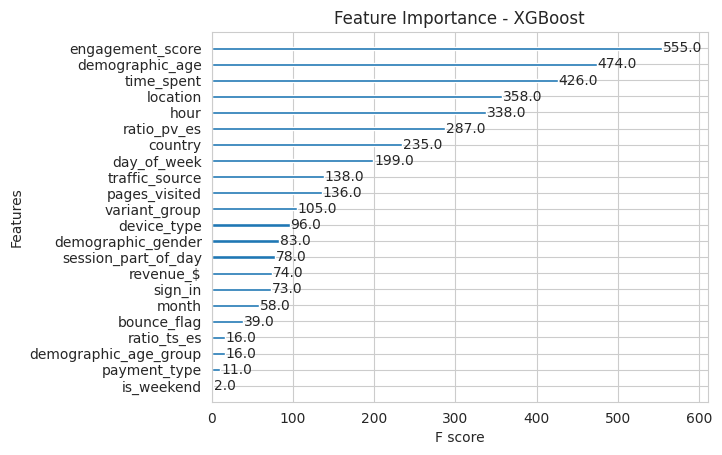

In [50]:
# Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title("Feature Importance - XGBoost")
plt.show()

Insight: `engagement_score` have highest F Score

## Evaluation

Confusion Matrix:
[[5097    1]
 [ 322  580]]


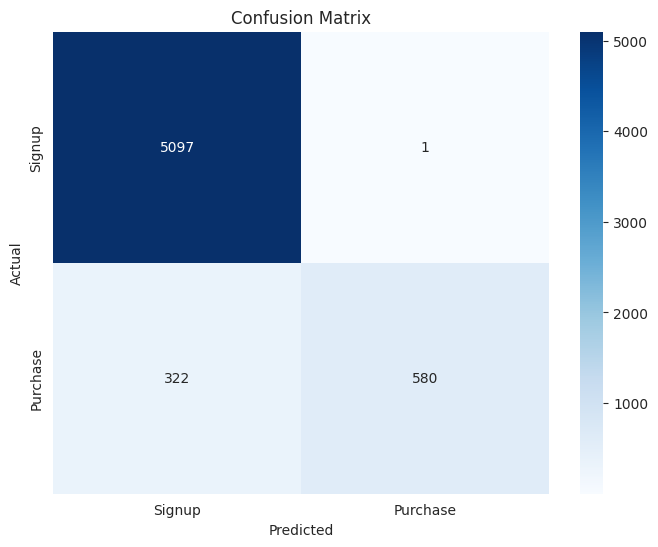

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5098
           1       1.00      0.64      0.78       902

    accuracy                           0.95      6000
   macro avg       0.97      0.82      0.88      6000
weighted avg       0.95      0.95      0.94      6000



In [51]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Signup', 'Purchase'],
            yticklabels=['Signup', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

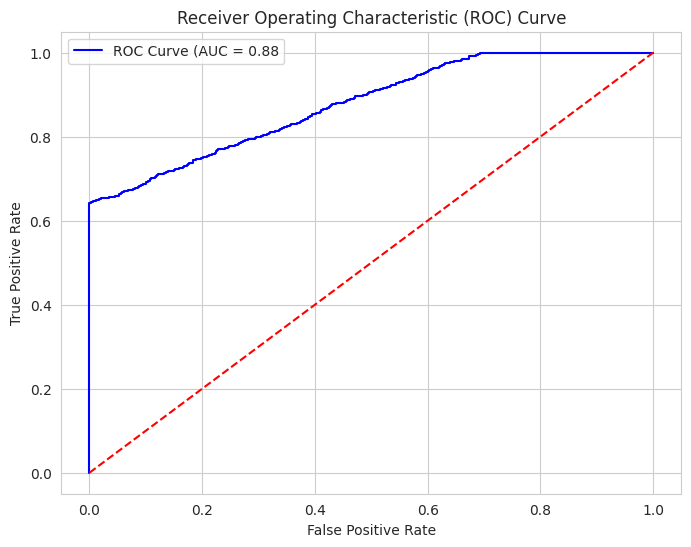

In [52]:
# Plot AUC (ROC Curve)
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Concluusion

 - For A/B Testing Since the p-value is 0.05 for both tests, H0 (null hypothesis) is rejected, meaning at least one group is significantly different from the others in terms of both conversion and income.

 - Tukey's Honest Significant Difference (Tukey's HSD) for `conversion_flag` with `variant_group` significantly for all variant. For `revenue_$` with `variant_group` Heat Vs Vibrant the P-Value slightly above 0.5, the difference is not significanly and means Heat and Vibrant not significant difference in revenue

 - Multivariate Analysis of Variance (MANOVA) only `variant_group` have p-value under 0.05, `time-spend` and `page_visited` not significante

 - Payment Analysis mean `payment_analysis` highest is with AMMEX with Card and total payment type highest is `payment_type` Card

 - `conversion_flag` 0 use NCT, for modeling not use this feature
 - Accuracy model is 94% with ROC Curve AUC is 88%

## Reference

1. https://xgboost.readthedocs.io/en/release_3.0.0/tutorials/index.html

2. https://xbe.at/

3. https://scikit-learn.org/stable/index.html